# Dictionary on DataSet of Titanic.
survival: Survival (0 = no; 1 = yes)
class: Passenger class (1 = first; 2 = second; 3 = third)
name: Name
sex: Sex
age: Age
sibsp: Number of siblings/spouses aboard
parch: Number of parents/children aboard
ticket: Ticket number
fare: Passenger fare
cabin: Cabin
embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat: Lifeboat (if survived)
body: Body number (if did not survive and body was recovered)

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

import seaborn as sns
from sklearn import metrics, preprocessing
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline

In [2]:
pwd()

'C:\\Users\\Somesh\\Jupyter_Python\\Titanic'

In [3]:
#titanicData = pd.read_excel('F:\\Shashi\\Reva Assignments\\Predictive Analysis\\titanic.xls', index_col=None, na_values=['NA'])
titanicData = pd.read_excel('C:\\Users\\Somesh\\Jupyter_Python\\Titanic\\titanic.xls', index_col=None, na_values=['NA'])

In [4]:
titanicData.sample(10)
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


# Exploratory Data Analysis

In [5]:
pandas_profiling.ProfileReport(titanicData)

Number of variables,14
Number of observations,1309
Total Missing (%),21.0%
Total size in memory,143.2 KiB
Average record size in memory,112.1 B
Numeric,6
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [6]:
titanicData.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Data Visualization

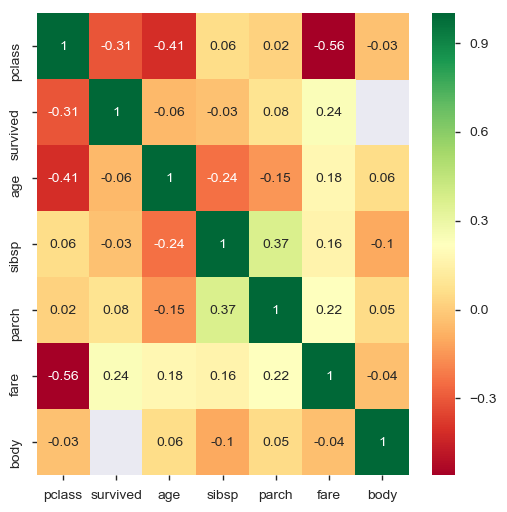

In [7]:
# compute the pair wise correlation for all columns  
correlation_matrix = titanicData.corr().round(2)
plt.subplots(figsize=(6,6))
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',annot=True)#List of columns of titanicData


In [8]:
#List of columns of titanicData
titanicData.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [9]:
titanicData.shape

(1309, 14)

In [10]:
#let’s examine the overall chance of survival for a Titanic passenger.
titanicData['survived'].mean()

0.3819709702062643

In [11]:
#To get a view into the composition of each class, we can group data by class, and view the averages for each column:
titanicData.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [12]:
titanicData.groupby('embarked').mean()

,pclass,survived,age,sibsp,parch,fare,body
embarked,,,,,,,
C,1.851852,0.555556,32.332154,0.400000,0.370370,62.336267,162.000000
Q,2.894309,0.357724,28.630000,0.341463,0.113821,12.409012,175.142857
S,2.347921,0.332604,29.245205,0.550328,0.426696,27.418824,159.348315


In [13]:
titanicData.groupby('sex').mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [14]:
class_sex_grouping = titanicData.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

In [15]:

titaniCData= titanicData
titanicData.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

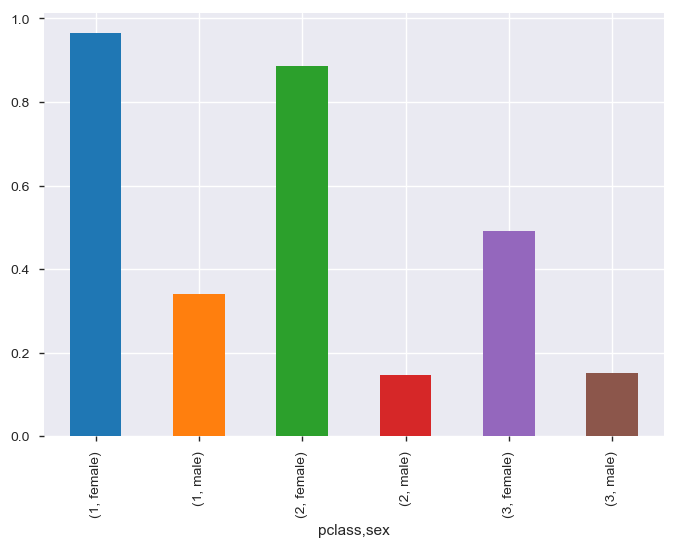

In [16]:
class_sex_grouping['survived'].plot.bar()

In [17]:
titanicData.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [18]:
tdata=titanicData

In [19]:
tdata['age'].min(), tdata['age'].max()

(0.1667, 80.0)

In [20]:
tdata['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [21]:
tdata['survived'].value_counts() *100/len (tdata)

0    61.802903
1    38.197097
Name: survived, dtype: float64

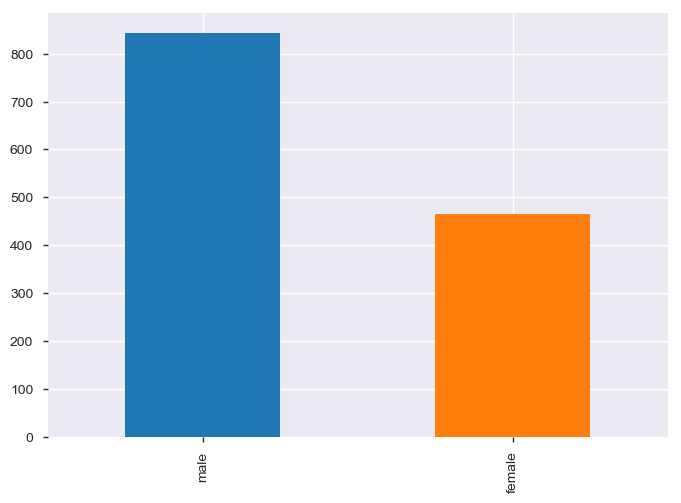

In [22]:
alpha_color = 0.7
tdata['sex'].value_counts() .plot (kind='bar')

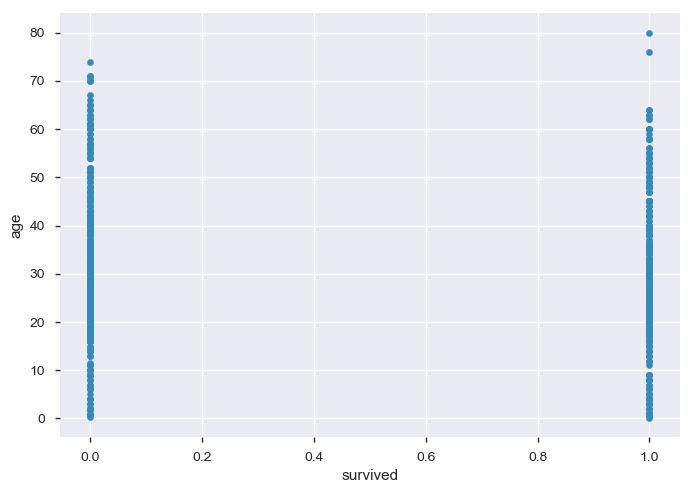

In [23]:
tdata.plot(kind='scatter',x='survived' , y='age' )

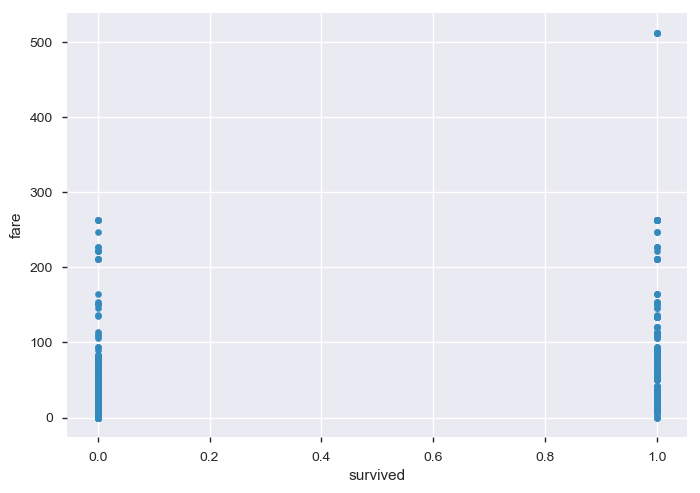

In [24]:
tdata.plot(kind='scatter',x='survived' , y='fare' )

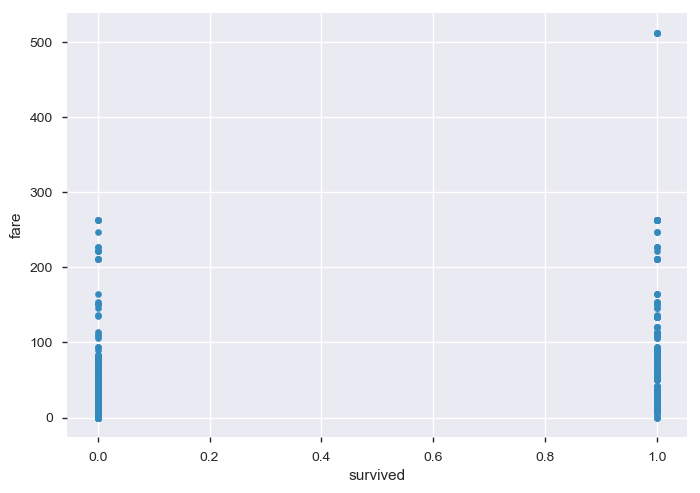

In [25]:
tdata.plot(kind='scatter',x='survived' , y='fare' )

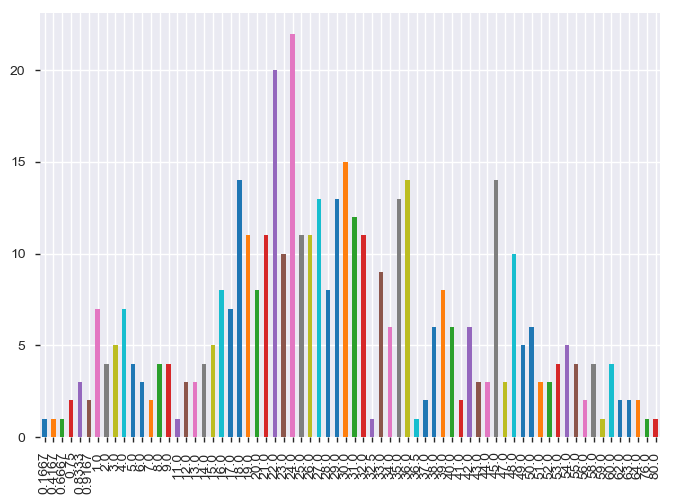

In [26]:
tdata[tdata['survived']==1] ['age'].value_counts().sort_index().plot(kind='bar')

In [27]:
bins =[0,10,20,30,40,50,60,70,80]
tdata['Agebin'] =pd.cut(tdata['age'],bins)

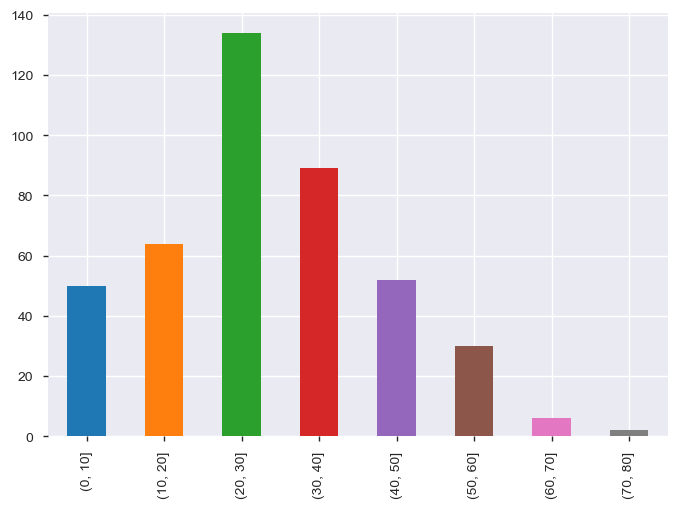

In [28]:
tdata[tdata['survived']==1] ['Agebin'].value_counts().sort_index().plot(kind='bar')

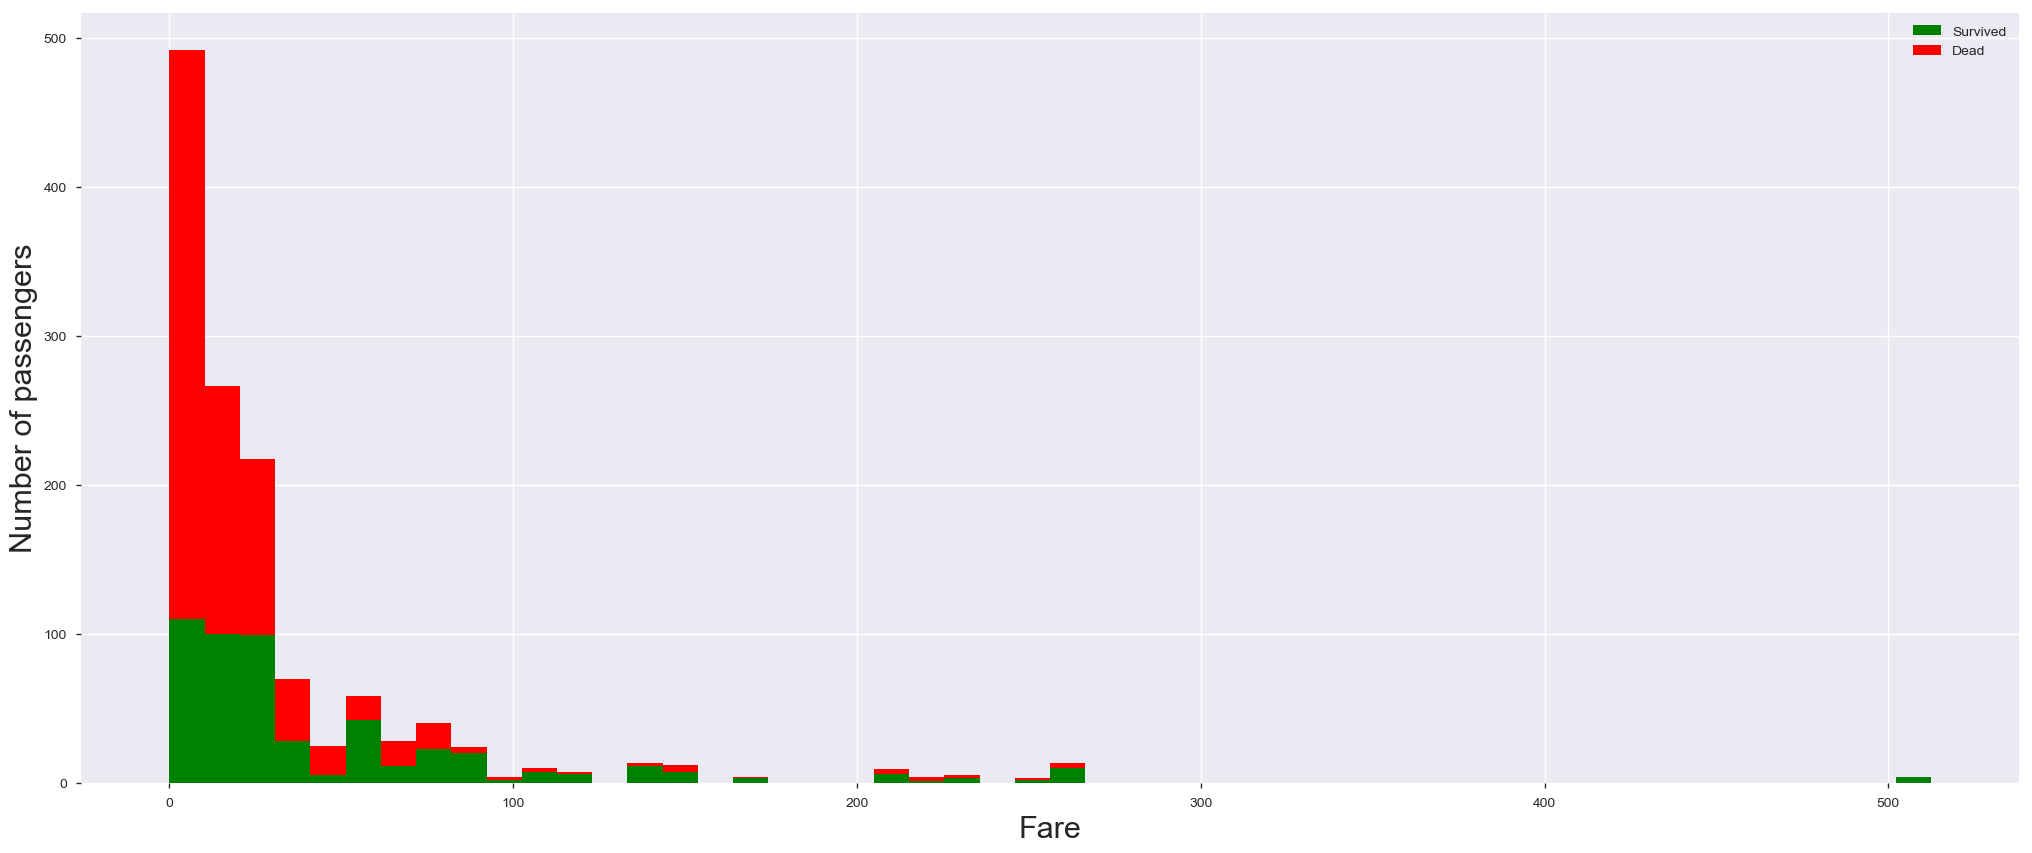

In [29]:
figure = plt.figure(figsize=(25, 10))
plt.hist([tdata[tdata['survived'] == 1]['fare'], tdata[tdata['survived'] == 0]['fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Number of passengers',{'fontname':'Arial', 'size':'22'})
plt.legend();

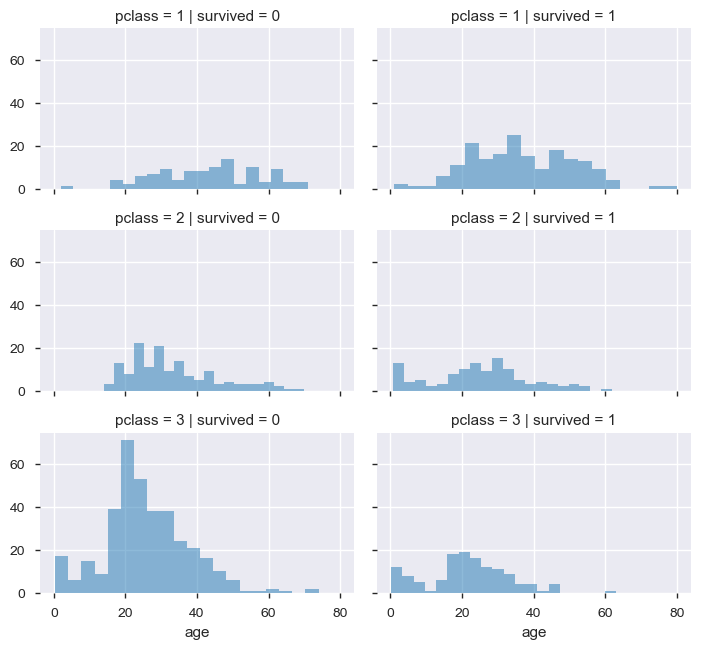

In [30]:
grid = sns.FacetGrid(tdata, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

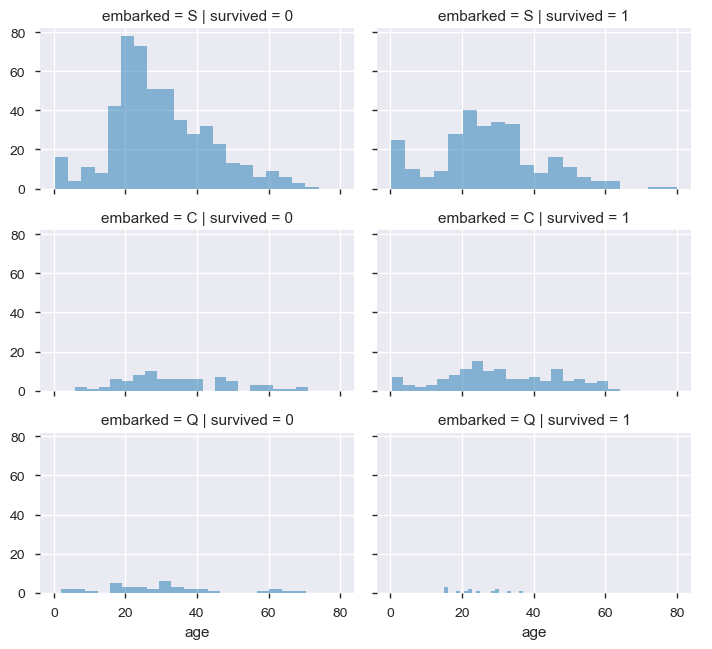

In [31]:
grid = sns.FacetGrid(tdata, col='survived', row='embarked', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

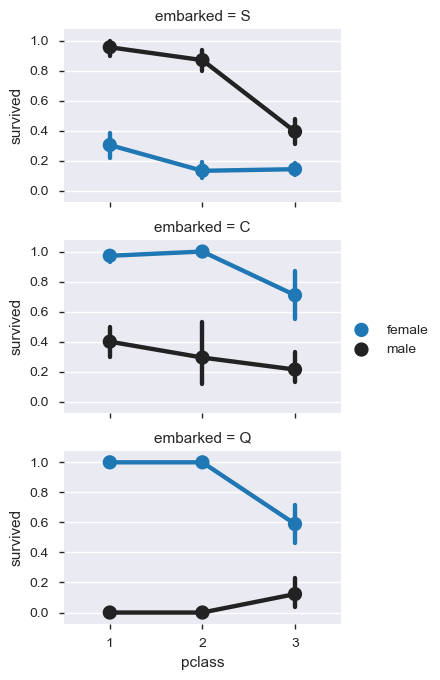

In [32]:
FacetGrid = sns.FacetGrid (tdata , row = 'embarked' , size = 2.3, aspect = 1.6 )
FacetGrid.map(sns.pointplot, 'pclass','survived','sex', palette = None,  order = None, hue_order = None)
FacetGrid.add_legend()

In [33]:
data1 = [tdata]
for dataset in data1:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

tdata['not_alone'].value_counts()

1    790
0    519
Name: not_alone, dtype: int64

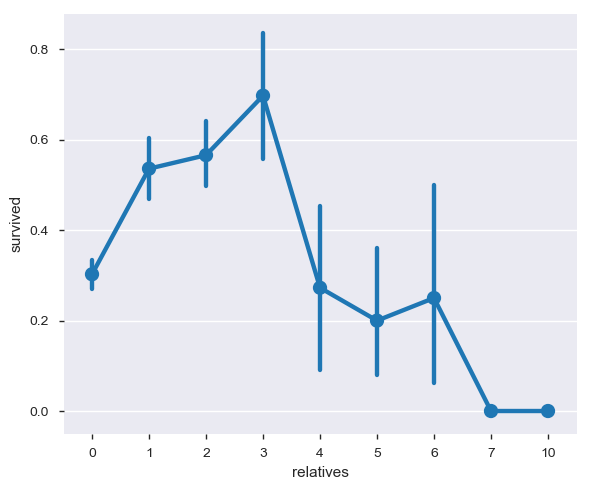

In [34]:
axes = sns.factorplot('relatives','survived', 
                      data=tdata, aspect = 1.2, )

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [35]:
featureEngData = tdata
featureEngData.info()
featureEngData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
Agebin       1046 non-null category
relatives    1309 non-null int64
not_alone    1309 non-null int32
dtypes: category(1), float64(3), int32(1), int64(5), object(7)
memory usage: 160.0+ KB


(1309, 17)

In [36]:
#Extracting the passenger titles
titles = set()
for name in featureEngData['name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)

{'Dr', 'Rev', 'Mme', 'Master', 'Lady', 'Dona', 'Ms', 'Jonkheer', 'Sir', 'Capt', 'the Countess', 'Don', 'Mr', 'Mlle', 'Miss', 'Col', 'Mrs', 'Major'}


In [37]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # extract the title from each name
    featureEngData['title'] = featureEngData['name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title we map each title
    featureEngData['title'] = featureEngData.title.map(Title_Dictionary)    
    return featureEngData

In [38]:
featureEngData = get_titles()
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Agebin,relatives,not_alone,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","(20, 30]",0,1,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]",3,0,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]",3,0,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","(20, 30]",3,0,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(20, 30]",3,0,Mrs


In [39]:
# check if the titles have been filled correctly.
featureEngData[featureEngData['title'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Agebin,relatives,not_alone,title
218,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,8,NaN,NaN,"(30, 40]",0,1,NaN


In [40]:
# encoding in dummy variable
titles_dummies = pd.get_dummies(featureEngData['title'], prefix='Title')
featureEngData = pd.concat([featureEngData, titles_dummies], axis=1)
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Agebin,relatives,not_alone,title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,"(20, 30]",0,1,Miss,0,1,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,"(0, 10]",3,0,Master,1,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,"(0, 10]",3,0,Miss,0,1,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,"(20, 30]",3,0,Mr,0,0,1,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,"(20, 30]",3,0,Mrs,0,0,0,1,0,0


In [41]:
print (featureEngData.iloc[:1309].age.isnull().sum())

263


In [42]:
#Now lets see by grouping function for both class, title sex:

grouped_train = featureEngData.iloc[:1309].groupby(['pclass','title','sex'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['sex', 'pclass', 'title', 'age']]

In [43]:
grouped_median_train.head()

,sex,pclass,title,age
0,male,1,Master,6.0
1,female,1,Miss,30.0
2,male,1,Mr,41.5
3,female,1,Mrs,45.0
4,female,1,Officer,49.0


In [44]:
def fill_age(row):
    condition = (
        (grouped_median_train['sex'] == row['sex']) & 
        (grouped_median_train['title'] == row['title']) & 
        (grouped_median_train['pclass'] == row['pclass'])
    ) 
    return grouped_median_train[condition]['age'].values[0]

def process_age():
    # a function that fills the missing values of the Age variable
    featureEngData['age'] = featureEngData.apply(lambda row: fill_age(row) if np.isnan(row['age']) else row['age'], axis=1)
    return featureEngData

In [45]:
featureEngData = process_age()
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Agebin,relatives,not_alone,title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,"(20, 30]",0,1,Miss,0,1,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,"(0, 10]",3,0,Master,1,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,"(0, 10]",3,0,Miss,0,1,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,"(20, 30]",3,0,Mr,0,0,1,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,"(20, 30]",3,0,Mrs,0,0,0,1,0,0


In [46]:
print (featureEngData.iloc[:1309].age.isnull().sum())

0


In [47]:
#processing for fare
print (featureEngData.iloc[:1309].fare.isnull().sum())

1


In [48]:
# there's one missing fare value - replacing it with the mean.
featureEngData.fare.fillna(featureEngData.iloc[:1309].fare.mean(), inplace=True)
print (featureEngData.iloc[:1309].fare.isnull().sum())

0


In [49]:
#processing for Embarked
print (featureEngData.iloc[:1309].embarked.isnull().sum())

2


In [53]:
print('Counts of Labels')
featureEngData.groupby("embarked").size()

Counts of Labels


AttributeError: 'NoneType' object has no attribute 'groupby'

In [54]:
# two missing embarked values - filling them with the most frequent one in the featureEngData set(S)
featureEngData  = featureEngData.embarked.fillna('S', inplace=True)

AttributeError: 'NoneType' object has no attribute 'embarked'

In [55]:
# dummy encoding for embarked values 
embarked_dummies = pd.get_dummies(featureEngData['embarked'], prefix='Embarked')
featureEngData = pd.concat([featureEngData, embarked_dummies], axis=1)
featureEngData.head()
featureEngData.shape

TypeError: 'NoneType' object is not subscriptable

In [56]:
featureEngData.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [57]:
#processing for pclass
print (featureEngData.iloc[:1309].pclass.isnull().sum())

AttributeError: 'NoneType' object has no attribute 'iloc'

In [ ]:
 #encoding into 3 categories:
pclass_dummies = pd.get_dummies(featureEngData['pclass'], prefix="Pclass")
# adding dummy variable
featureEngData = pd.concat([featureEngData, pclass_dummies],axis=1)
featureEngData.head()
featureEngData.shape

In [ ]:
#processing for pclass
print (featureEngData.iloc[:1309].ticket.isnull().sum())

In [ ]:
NoneType = type(None)
IntType = type(int)
def cleanTicket(ticket):
    if type(ticket) == NoneType:
        return 'XXX'
    elif type(ticket) == int:
        return 'XXX'
    else:
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'

In [ ]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
tickets = set()
for t in featureEngData['ticket']:
    tickets.add(cleanTicket(t))

In [ ]:
# Extracting dummy variables from tickets:

featureEngData['ticket'] = featureEngData['ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(featureEngData['ticket'], prefix='Ticket')
featureEngData = pd.concat([featureEngData, tickets_dummies], axis=1)
featureEngData.head()
featureEngData.shape

In [ ]:
# Extracting dummy variables from sex:
featureEngData['sex'] = featureEngData['sex'].map({'male':1, 'female':0})

In [ ]:
print('Counts of Labels')
featureEngData.groupby("ticket").size()

In [ ]:
# introducing a new feature : the size of families (including the passenger)
featureEngData['FamilySize'] = featureEngData['parch'] + featureEngData['sibsp'] + 1

# introducing other features based on the family size
featureEngData['Singleton'] = featureEngData['FamilySize'].map(lambda s: 1 if s == 1 else 0)
featureEngData['SmallFamily'] = featureEngData['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
featureEngData['LargeFamily'] = featureEngData['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
featureEngData.head()
featureEngData.shape

In [ ]:
# removing the all duplicate  variables like (title,embarked)
featureEngData.drop('name', axis=1, inplace=True)
featureEngData.drop('embarked', axis=1, inplace=True)
featureEngData.drop('cabin', axis=1, inplace=True)
featureEngData.drop('pclass',axis=1,inplace=True)
featureEngData.drop('ticket', inplace=True, axis=1)
featureEngData.drop('title', axis=1, inplace=True)
featureEngData.drop('boat', axis=1, inplace=True)
featureEngData.drop('body', axis=1, inplace=True)
featureEngData.drop('Agebin', axis=1, inplace=True)
featureEngData.drop('home.dest', axis=1, inplace=True)

In [ ]:
featureEngData.head()
featureEngData.info()

In [ ]:
X = featureEngData
y = titanicData['survived'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion="gini",max_depth=10)
clf_dt.fit (X_train, y_train)
classes = clf_dt.predict(X_test)
clf_dt.score (X_test, y_test)

In [ ]:
import sklearn.tree as dt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
